# Regression with the Airfoil Self-Noise Dataset
In this notebook, We will use regression to model the "Airfoil-Self Noise" Dataset. The data and a description of it can be found here: https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise.

## Import Libraries
To start, we import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import Lasso

## Data Preparation
The frst objective is to convert the data into a DataFrame. We start by importing the data as an array, and then converting the array into a DataFrame. The created data array will not have any labels for its columns, and so I must manually enter them. I consult the previously linked UCI Machine Learning Repository page to address this. 

In [2]:
data = np.loadtxt('airfoil_self_noise.dat')

# Label the columns in a dictionary which will then be converted into a DataFrame.
data = {'Frequency': data[:, 0], 'Angle of attack': data[:, 1], 'Chord length': data[:, 2], 'Free stream velocity': data[:, 3],
       'Suction side displacement thickness': data[:, 4], 'Scaled sound pressure level': data[:, 5]}

data = pd.DataFrame(data)

data.head()

,Frequency,Angle of attack,Chord length,Free stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800.0,0.0,0.3048,71.3,0.002663,126.201
1,1000.0,0.0,0.3048,71.3,0.002663,125.201
2,1250.0,0.0,0.3048,71.3,0.002663,125.951
3,1600.0,0.0,0.3048,71.3,0.002663,127.591
4,2000.0,0.0,0.3048,71.3,0.002663,127.461


Great, we now have a tidy dataset. The first five columns will be our independent variables, while the final column will be our dependent variable. Note that we have not included the units of measurement of the variables. This is because we are not concerned with the interpretability of the relationship between the independent variables and the dependent variable, since the main objective here is to obtain a low validation error, and not to explain which independent variables best explain the dependent variable. To do this wold require good domain knowledge in the field that the data has come from, which I do not possess. 

## Data Exploration
In this section, we will uncover the extent of the correlations between the variables. We will do this by using the 'corr' method of our DataFrame. We then use the heatmap method of the 'seaborn' library to visualise the correlations.

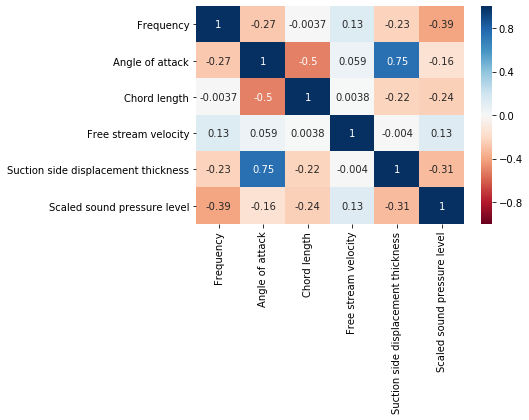

In [3]:
sns.heatmap(data.corr(), -1, 1, plt.cm.RdBu, annot=True)
plt.show()

One of the first things we notice from the plot is that the correlations between the independent variables and the dependent variable are not too great, but they are correlated enough to suggest that there is a relationship. This suggests to me that a combination of the independent variables are going to fit well to the dependent variable, rather than each individual independent variable fitting well to the dependent varable by itself.

We should also note that there is a fairly strong correlation between the 'Suction side displacement thickness' and 'Angle of attack' variables. This is also true for the 'Chord length' and 'Angle of attack' variables. These correlations are not desirable, however, since we do not have many variables, we will leave the variables unchanged. If we did have more variables, we could have deployed a strategy such as dimensionality reduction, or simply deleting some of the variables.

To finish this section, we should check whether or not our variables are normally distributed. Ensuring the variables are normally distributed is a key assumption that the linear regression model makes.

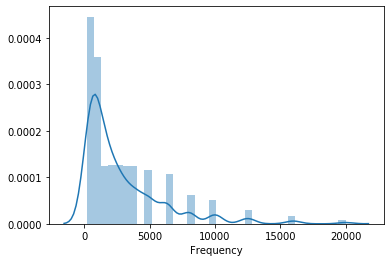

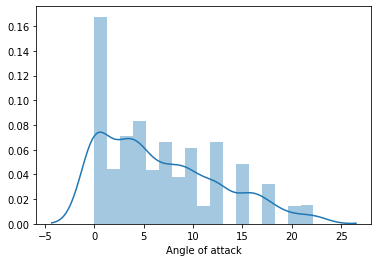

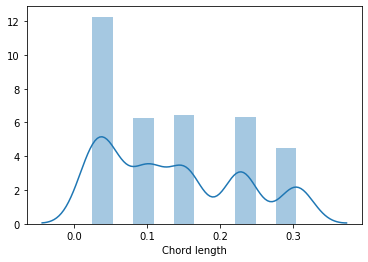

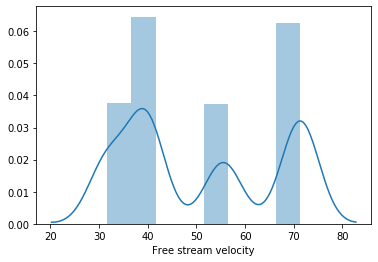

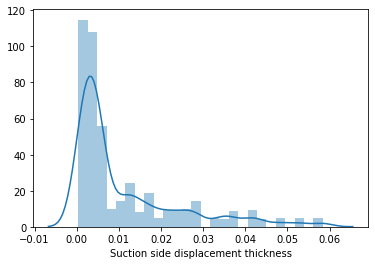

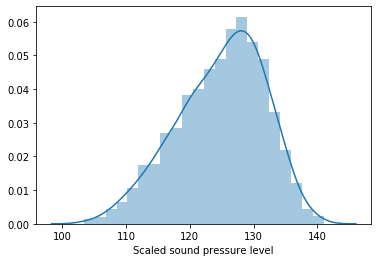

In [4]:
for col in data.columns:
    
    sns.distplot(data[col])
    plt.show()

Oh dear, what a mess. The only variable that seems to be normally distributed is the independent variable. We can also see that the 'Frequency' and 'Suction side displacement thickness' variables sort of look normally distributed, but each have one long tail that prevents the desired distribution. This puts an end to our plan of using linear regression to model the data, but we will see if a more flexible, i.e. more non-linear, model will allow us to achieve a satisfactory validation error.

## Data Preprocessing
We can see from the previous plots that the variables' values are quite different from one another, i.e., they are on fairly different scales. It is important that the variables are on similar scales so that our model does not misinterpretate their weightings. To scale the variables, we will use "sklearn's" "MinMaxScaler" method. This method takes its given input, and outputs a scaled version of the input, with values between 0 and 1. Since we will be using the MinMaxScaler on all of our variables, we will thus ensure that all of our variables are on the same scale.

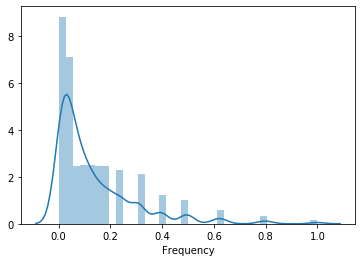

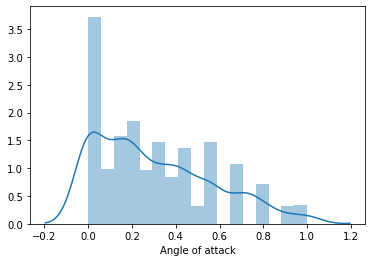

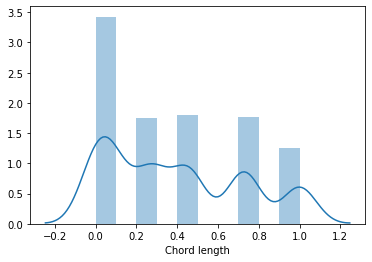

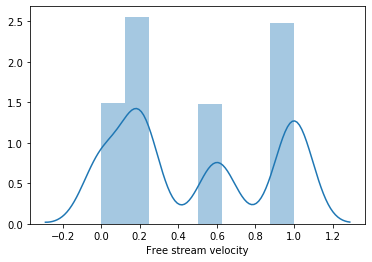

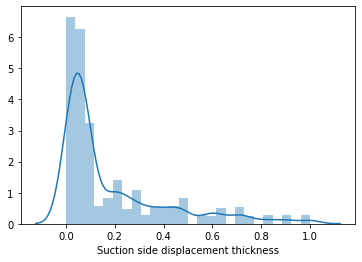

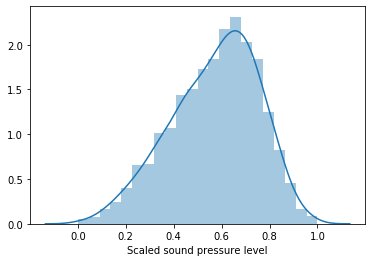

In [5]:
scaler = MinMaxScaler()

scaler.fit(data)

data = scaler.transform(data)

data = {'Frequency': data[:, 0], 'Angle of attack': data[:, 1], 'Chord length': data[:, 2], 'Free stream velocity': data[:, 3],
       'Suction side displacement thickness': data[:, 4], 'Scaled sound pressure level': data[:, 5]}

data = pd.DataFrame(data)

for col in data.columns:
    
    sns.distplot(data[col])
    plt.show()

Great!

## Modelling
To finish off this notebook, we finally try to fit a model to the data, as best we can. The model we will be using is the "Lasso" model. This model is ideal for our situation - that being our low number of independent variables - since it favours sparse independent variables. To test our model, we define an error function which prints the validation error...

In [6]:
features = data.drop('Scaled sound pressure level', 1)
target = data['Scaled sound pressure level']

def error(model):
     
    error = cross_val_score(model, features, target, scoring='neg_mean_squared_error', cv=5)
        
    print('\n', "Validaton error: ", -error.mean())       

lasso = Lasso()

error(lasso)


 Validaton error:  0.03418220149777649


Good! An error of 3% suggests to us that we have picked a good model to fit to our data.